In [1]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | peniche
Processing Record 4 of Set 1 | maceio
Processing Record 5 of Set 1 | saint-paul
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | kaitangata
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | grand gaube
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | lincoln
Processing Record 20 of Set 1 | san carlos de bariloche
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | bredasdorp
Proces

Processing Record 37 of Set 4 | meulaboh
Processing Record 38 of Set 4 | guozhen
Processing Record 39 of Set 4 | kaitong
Processing Record 40 of Set 4 | karaton
Processing Record 41 of Set 4 | aksehir
Processing Record 42 of Set 4 | lingao
Processing Record 43 of Set 4 | gunjur
Processing Record 44 of Set 4 | abu dhabi
Processing Record 45 of Set 4 | ishim
Processing Record 46 of Set 4 | hofn
Processing Record 47 of Set 4 | zhigansk
Processing Record 48 of Set 4 | skagastrond
City not found. Skipping...
Processing Record 49 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 50 of Set 4 | asau
Processing Record 1 of Set 5 | sao joao da barra
Processing Record 2 of Set 5 | kirakira
Processing Record 3 of Set 5 | hamilton
Processing Record 4 of Set 5 | norrtalje
Processing Record 5 of Set 5 | bubaque
Processing Record 6 of Set 5 | mabopane
Processing Record 7 of Set 5 | lompoc
Processing Record 8 of Set 5 | lebu
Processing Record 9 of Set 5 | skjervoy
Processing Record 10 o

Processing Record 22 of Set 8 | khormuj
City not found. Skipping...
Processing Record 23 of Set 8 | fortuna
Processing Record 24 of Set 8 | barwadih
Processing Record 25 of Set 8 | yashkul
Processing Record 26 of Set 8 | morlaix
Processing Record 27 of Set 8 | knysna
Processing Record 28 of Set 8 | muros
Processing Record 29 of Set 8 | tutoia
Processing Record 30 of Set 8 | salinopolis
Processing Record 31 of Set 8 | mayor pablo lagerenza
Processing Record 32 of Set 8 | ginir
Processing Record 33 of Set 8 | cooma
Processing Record 34 of Set 8 | mujiayingzi
Processing Record 35 of Set 8 | flinders
Processing Record 36 of Set 8 | padang
Processing Record 37 of Set 8 | codajas
Processing Record 38 of Set 8 | basoko
Processing Record 39 of Set 8 | pokaran
Processing Record 40 of Set 8 | khuzhir
Processing Record 41 of Set 8 | salalah
Processing Record 42 of Set 8 | isangel
Processing Record 43 of Set 8 | grand forks
Processing Record 44 of Set 8 | stephenville
Processing Record 45 of Set 8

Processing Record 8 of Set 12 | sao filipe
Processing Record 9 of Set 12 | porto walter
Processing Record 10 of Set 12 | nago
Processing Record 11 of Set 12 | adamas
Processing Record 12 of Set 12 | bojnurd
Processing Record 13 of Set 12 | safaqis
City not found. Skipping...
Processing Record 14 of Set 12 | oussouye
Processing Record 15 of Set 12 | skibbereen
Processing Record 16 of Set 12 | ligayan
Processing Record 17 of Set 12 | ifanadiana
Processing Record 18 of Set 12 | bandarbeyla
Processing Record 19 of Set 12 | nsanje
Processing Record 20 of Set 12 | zakamensk
Processing Record 21 of Set 12 | nanakuli
Processing Record 22 of Set 12 | whitehorse
Processing Record 23 of Set 12 | jiaohe
Processing Record 24 of Set 12 | paraiso
Processing Record 25 of Set 12 | port macquarie
Processing Record 26 of Set 12 | kununurra
Processing Record 27 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 28 of Set 12 | pilar
Processing Record 29 of Set 12 | qaqortoq
Processing 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,23.67,57,92,4.52,US,2022-01-27 23:44:31
1,Hermanus,-34.4187,19.2345,65.80,80,12,2.93,ZA,2022-01-27 23:45:58
2,Peniche,39.3558,-9.3811,54.88,62,1,10.47,PT,2022-01-27 23:45:59
3,Maceio,-9.6658,-35.7353,80.04,89,20,4.61,BR,2022-01-27 23:44:21
4,Saint-Paul,-21.0096,55.2707,73.51,78,30,2.24,RE,2022-01-27 23:45:59
5,Yellowknife,62.4560,-114.3525,-1.68,84,75,2.30,CA,2022-01-27 23:43:23
6,Punta Arenas,-53.1500,-70.9167,53.71,76,0,9.22,CL,2022-01-27 23:46:00
7,Bethel,41.3712,-73.4140,29.64,69,0,3.44,US,2022-01-27 23:42:36
8,Ushuaia,-54.8000,-68.3000,51.42,76,75,16.11,AR,2022-01-27 23:41:20
9,Busselton,-33.6500,115.3333,64.04,60,0,12.35,AU,2022-01-27 23:46:00


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-01-27 23:44:31,42.6001,-73.9662,23.67,57,92,4.52
1,Hermanus,ZA,2022-01-27 23:45:58,-34.4187,19.2345,65.80,80,12,2.93
2,Peniche,PT,2022-01-27 23:45:59,39.3558,-9.3811,54.88,62,1,10.47
3,Maceio,BR,2022-01-27 23:44:21,-9.6658,-35.7353,80.04,89,20,4.61
4,Saint-Paul,RE,2022-01-27 23:45:59,-21.0096,55.2707,73.51,78,30,2.24
...,...,...,...,...,...,...,...,...,...
562,Havelock,US,2022-01-28 00:00:48,34.8791,-76.9013,40.95,71,39,6.02
563,Kaoma,ZM,2022-01-28 00:00:48,-14.7833,24.8000,63.73,97,100,4.34
564,Hervey Bay,AU,2022-01-28 00:00:48,-25.2986,152.8535,86.04,70,85,8.99
565,Lashio,MM,2022-01-28 00:00:49,22.9333,97.7500,49.73,98,9,0.67


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

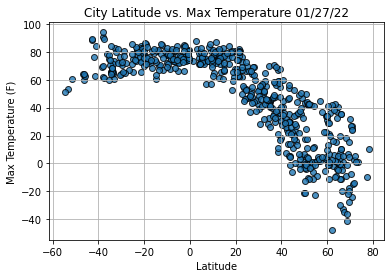

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

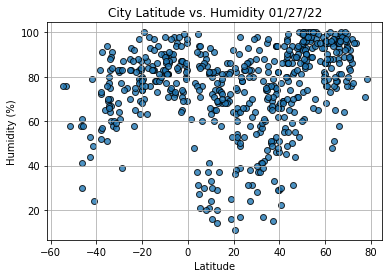

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

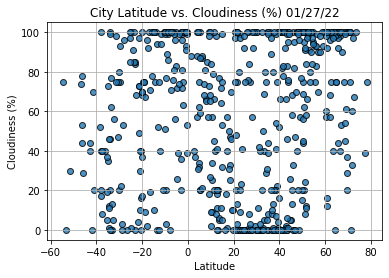

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

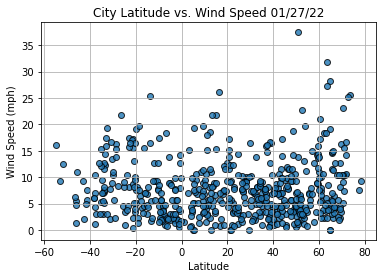

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.http://localhost:8889/notebooks/WeatherPy.ipynb#
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13] 


In [25]:
index13

City                      Rikitea
Country                        PF
Date          2022-01-27 23:46:01
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    78.73
Humidity                       75
Cloudiness                     84
Wind Speed                  17.45
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
562     True
563    False
564    False
565     True
566     True
Name: Lat, Length: 567, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-01-27 23:44:31,42.6001,-73.9662,23.67,57,92,4.52
2,Peniche,PT,2022-01-27 23:45:59,39.3558,-9.3811,54.88,62,1,10.47
5,Yellowknife,CA,2022-01-27 23:43:23,62.4560,-114.3525,-1.68,84,75,2.30
7,Bethel,US,2022-01-27 23:42:36,41.3712,-73.4140,29.64,69,0,3.44
10,Saint George,US,2022-01-27 23:41:01,37.1041,-113.5841,57.67,15,0,15.99
...,...,...,...,...,...,...,...,...,...
560,Dunmore East,IE,2022-01-28 00:00:47,52.1514,-6.9861,42.69,74,66,5.95
561,Tigil,RU,2022-01-28 00:00:47,57.8000,158.6667,4.64,95,98,1.43
562,Havelock,US,2022-01-28 00:00:48,34.8791,-76.9013,40.95,71,39,6.02
565,Lashio,MM,2022-01-28 00:00:49,22.9333,97.7500,49.73,98,9,0.67


In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-01-27 23:44:31,42.6001,-73.9662,23.67,57,92,4.52
2,Peniche,PT,2022-01-27 23:45:59,39.3558,-9.3811,54.88,62,1,10.47
5,Yellowknife,CA,2022-01-27 23:43:23,62.4560,-114.3525,-1.68,84,75,2.30
7,Bethel,US,2022-01-27 23:42:36,41.3712,-73.4140,29.64,69,0,3.44
10,Saint George,US,2022-01-27 23:41:01,37.1041,-113.5841,57.67,15,0,15.99


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

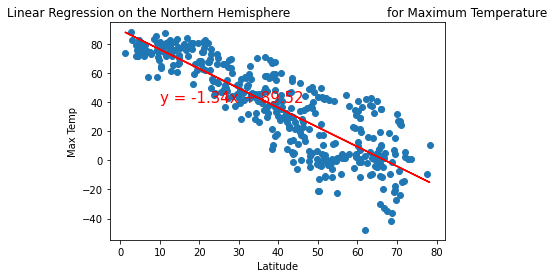

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

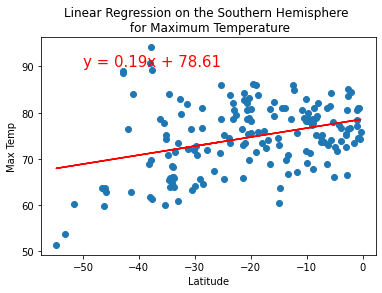

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

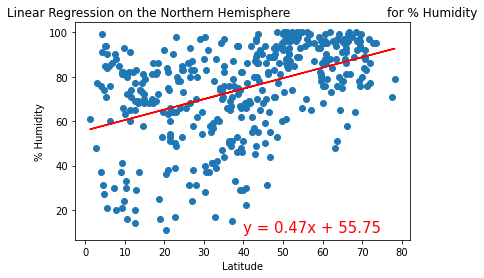

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

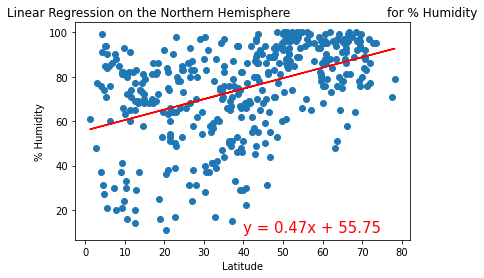

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

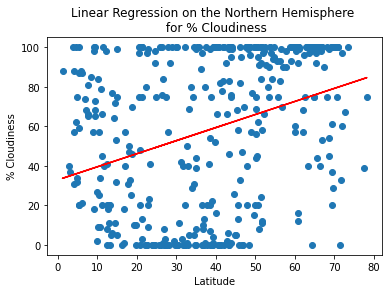

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

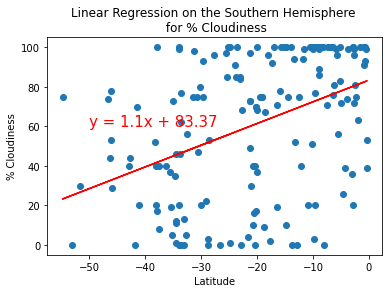

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

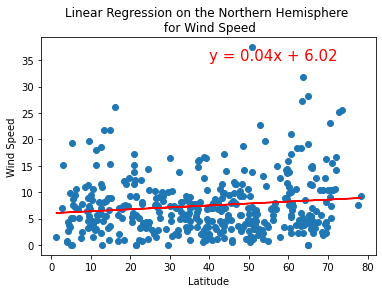

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

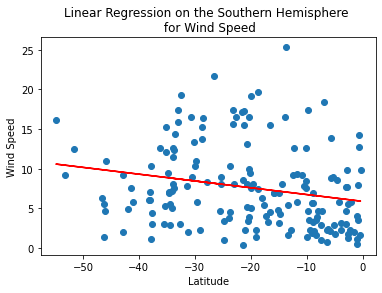

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))